In [1]:
#  Aluno: Joao Pedro Miranda Marques
#  Matricula 2017050495
#  UFMG
#
#  Rastrigin problem
#  Particle Swarm Optimization Algorithm 



#Bibliotecas
from numpy.random import rand
import random
from numpy.random import choice
from numpy import asarray
from numpy import clip
from numpy import argmin
from numpy import min
from numpy import around
import numpy as np
from matplotlib import pyplot
from itertools import product
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

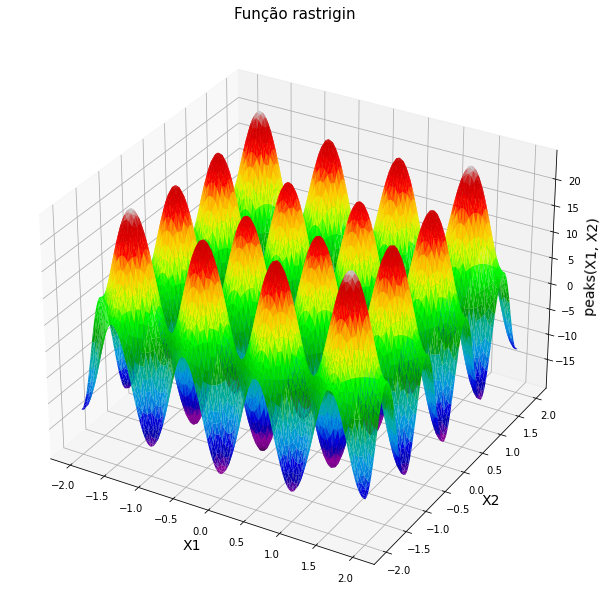

In [2]:
#Rastrigin Problem

def rastrigin(x):
    x = np.array(x).reshape(1, -1).T
    Q = np.eye(len(x))  
    X = Q.dot(x)

    n = len(X)
    F = 0
    
    for i in range(n):
        F = F + X[i]**2 - 10*np.cos(2*np.pi*X[i])
    
    return F[0]

x1 = x2 = np.linspace(-2, 2, 100)
x_p = np.array(list(product(x1,x2)))


font_labels = {'fontsize': 14, 'fontweight': 150}

fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig)
ax.set_title('Função rastrigin', fontdict={'fontsize':15})
ax.set_xlabel('X1', fontdict=font_labels)
ax.set_ylabel('X2', fontdict=font_labels)
ax.set_zlabel('peaks(X1, X2)', fontdict=font_labels)
surf = ax.plot_trisurf(x_p[:, 0], x_p[:, 1], [rastrigin(x_) for x_ in x_p], cmap=cm.nipy_spectral, linewidth=0.1)
plt.show()

In [3]:
#Some variables to calculate the velocity
W = 0.5 # Peso de inércia
c1 = 0.5 # Fator de aprendizagem cognitiva
c2 = 0.9 # Fator de aprendizagem social
target = 1

n_iterations = 50
target_error = 0
n_particles = 50

In [4]:
# Particle Swarm Optimization Algorithm
def PSO(W, c1, c2, target, n_iterations, target_error, n_particles):
    
    particle_position_vector = np.array([np.array([(-1) ** (bool(random.getrandbits(1))) * random.random()*50, (-1)**(bool(random.getrandbits(1))) * random.random()*50]) for _ in range(n_particles)])
    pbest_position = particle_position_vector
    pbest_fitness_value = np.array([float('inf') for _ in range(n_particles)])
    gbest_fitness_value = float('inf')
    gbest_position = np.array([float('inf'), float('inf')])
    velocity_vector = ([np.array([0, 0]) for _ in range(n_particles)])
    
    iteration = 0
    # initialise list to store the objective function value at each iteration
    
    solution = list()
    solutionInt = list()
    
    while iteration < n_iterations:
        for i in range(n_particles):
            fitness_cadidate = rastrigin(particle_position_vector[i])
            #print(fitness_cadidate, ' ', particle_position_vector[i])
            solution.append(fitness_cadidate)
            solutionInt.append(iteration)
            
            if(pbest_fitness_value[i] > fitness_cadidate):
                pbest_fitness_value[i] = fitness_cadidate
                pbest_position[i] = particle_position_vector[i]

            if(gbest_fitness_value > fitness_cadidate):
                gbest_fitness_value = fitness_cadidate
                gbest_position = particle_position_vector[i]

        if(abs(gbest_fitness_value - target) < target_error):
            break

        for i in range(n_particles):
            new_velocity = (W*velocity_vector[i]) + (c1*random.random()) * (pbest_position[i] - particle_position_vector[i]) + (c2*random.random()) * (gbest_position-particle_position_vector[i])
            new_position = new_velocity + particle_position_vector[i]
            particle_position_vector[i] = new_position

        iteration = iteration + 1
        
    return solution, solutionInt, fitness_cadidate, gbest_position,iteration
    


Final Position is:  -18.010081885813417 The best position is  [-0.99495864 -0.99495864] in iteration number  50


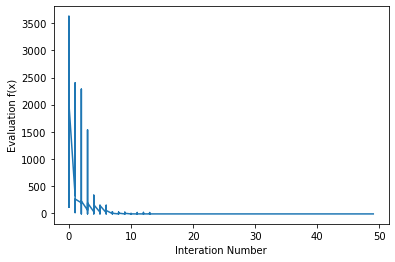

In [5]:
solution, solutionInt, fitness_cadidate, gbest_position,iteration = PSO(W, c1, c2, target, n_iterations, target_error, n_particles)
print("Final Position is: ", fitness_cadidate, "The best position is ", gbest_position, "in iteration number ", iteration)

# line plot of best objective function values
pyplot.plot(solutionInt, solution)
pyplot.xlabel('Interation Number')
pyplot.ylabel('Evaluation f(x)')
pyplot.show()